### Step 1 Load data into data frame

In [1]:
import pandas as pd

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv('toys_and_games_year_2022.csv')

In [ ]:
### Step 2 Pick week before Holiday

In [3]:
# Define the date range
start_date = '12-17-2022'
end_date = '12-25-2022'

# Filter the DataFrame for the date range
filtered_df_holiday = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

# Print the shape of the filtered DataFrame
print(filtered_df_holiday.shape)


(72435, 8)


### Step 3 Sort the data by dates

In [7]:
sorted_df_2022 = filtered_df_holiday.sort_values(by='date', ascending=False)


### Step 4 Check the rating distribution

<Axes: title={'center': 'Rating reviews week of Chrismas 2022'}>

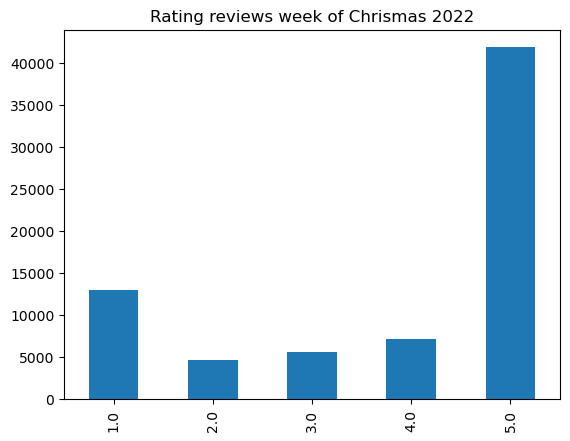

In [9]:
#Score Column evaluation
sorted_df_2022['rating'].value_counts().sort_index().plot(kind='bar', title='Rating reviews week of Chrismas 2022')

### Step 5 Load nltk dependencies

In [11]:
#Load Dependencies
import nltk
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 6 Vader Sentiment Analyis

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyizer_object = SentimentIntensityAnalyzer()

### Step 7 For loop to run sentiment analysis and save in a new res dictiona

In [15]:
sorted_df_2022

,rating,text,asin,timestamp,parent_asin,title,main_category,date
865620,5.0,Baby loves the song and interaction. I was sur...,B01N12F566,2022-12-25 18:31:15.967,B01N12F566,"Cuddle Barn | Wheelie 8"" School Bus Singing St...",Toys & Games,12-25-2022
289181,4.0,Colors are amazing. However the instructions w...,B092J3MWMZ,2022-12-25 15:05:15.545,B0BY6QTVB5,W&O Dragon Hero Kids Tent with Roar Button - E...,Toys & Games,12-25-2022
1678497,1.0,Disappointed 6 missing pieces so we couldn’t e...,B09HZ1GSW1,2022-12-25 16:16:05.245,B0BDTBDB3Y,BEYBLADE Burst Pro Series Evo Elite Champions ...,Toys & Games,12-25-2022
1239760,5.0,[[VIDEOID:a59bfda4903dd144a50de0bf11405a68]] S...,B0BFDX2X5N,2022-12-25 04:42:59.720,B0BM7PW7K6,My Quiet Book - Toddler Travel Toys for Age 2 ...,Toys & Games,12-25-2022
1239885,3.0,"My son loves these little finger puppets, as h...",B09JRC5B9T,2022-12-25 13:56:05.261,B0B3TRQ837,Ginsey Nickelodeon PAW Patrol 10 Piece Finger ...,Baby,12-25-2022
...,...,...,...,...,...,...,...,...
1412023,5.0,Absolutely love these! I only wanted to try be...,B0B1M9L2YG,2022-12-17 05:27:55.202,B0B1M8CP35,GIFTOURS Reusable Water Balloons Quick Fill Se...,Toys & Games,12-17-2022
1612367,2.0,They are cute but most of them doesn’t work I ...,B09TW66DSZ,2022-12-17 13:19:36.675,B0B4S613XL,Stondino 6PCS Video Game Party Favors Video Ga...,Toys & Games,12-17-2022
1048051,1.0,You couldn’t fit any gumball In this tiny mach...,B084YTLJR3,2022-12-17 23:10:04.748,B0C2ZYZMJS,"ArtCreativity Gumball Machine for Kids, Set of...",Grocery,12-17-2022
991427,4.0,I ordered Blue not Pink. Fun but Not as advert...,B0B8NS2CNW,2022-12-17 19:54:07.991,B0BY2T4KS7,"TOMZON A32 Flying Toy, Flying Orb Ball Hover B...",Toys & Games,12-17-2022


### Step 8 For loop to run sentiment analysis and save in a new res dictionary

In [17]:
### Run the polarity score on the entire dataset

sorted_df_2022['text'] = sorted_df_2022['text'].astype(str)

res = {}
for i, row in tqdm(sorted_df_2022.iterrows(), total=len(sorted_df_2022)):
    text = row['text']
    #print(text)
    res[i] = sentiment_analyizer_object.polarity_scores(text)

  0%|          | 0/72435 [00:00<?, ?it/s]

### Step 9 Save dictionary into a dataframe and print it out

In [19]:
vaders_christmas_2022 = pd.DataFrame(res).T
vaders_christmas_2022

,neg,neu,pos,compound
865620,0.000,0.574,0.426,0.9682
289181,0.014,0.753,0.233,0.9800
1678497,0.325,0.675,0.000,-0.6486
1239760,0.049,0.830,0.121,0.8346
1239885,0.032,0.797,0.171,0.8885
...,...,...,...,...
1412023,0.043,0.739,0.218,0.9751
1612367,0.236,0.637,0.127,-0.4019
1048051,0.093,0.746,0.161,0.3182
991427,0.093,0.907,0.000,-0.2146


### Step 10 Merge the vader dataset with Neg/Neu/Pos compound fields with the original 2022 sorted data set

In [21]:
vaders_christmas_2022 = pd.DataFrame(res).T
merged_christmas_2022 = pd.merge(vaders_christmas_2022, sorted_df_2022, left_index=True, right_index=True)

In [23]:
merged_christmas_2022

,neg,neu,pos,compound,rating,text,asin,timestamp,parent_asin,title,main_category,date
865620,0.000,0.574,0.426,0.9682,5.0,Baby loves the song and interaction. I was sur...,B01N12F566,2022-12-25 18:31:15.967,B01N12F566,"Cuddle Barn | Wheelie 8"" School Bus Singing St...",Toys & Games,12-25-2022
289181,0.014,0.753,0.233,0.9800,4.0,Colors are amazing. However the instructions w...,B092J3MWMZ,2022-12-25 15:05:15.545,B0BY6QTVB5,W&O Dragon Hero Kids Tent with Roar Button - E...,Toys & Games,12-25-2022
1678497,0.325,0.675,0.000,-0.6486,1.0,Disappointed 6 missing pieces so we couldn’t e...,B09HZ1GSW1,2022-12-25 16:16:05.245,B0BDTBDB3Y,BEYBLADE Burst Pro Series Evo Elite Champions ...,Toys & Games,12-25-2022
1239760,0.049,0.830,0.121,0.8346,5.0,[[VIDEOID:a59bfda4903dd144a50de0bf11405a68]] S...,B0BFDX2X5N,2022-12-25 04:42:59.720,B0BM7PW7K6,My Quiet Book - Toddler Travel Toys for Age 2 ...,Toys & Games,12-25-2022
1239885,0.032,0.797,0.171,0.8885,3.0,"My son loves these little finger puppets, as h...",B09JRC5B9T,2022-12-25 13:56:05.261,B0B3TRQ837,Ginsey Nickelodeon PAW Patrol 10 Piece Finger ...,Baby,12-25-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1412023,0.043,0.739,0.218,0.9751,5.0,Absolutely love these! I only wanted to try be...,B0B1M9L2YG,2022-12-17 05:27:55.202,B0B1M8CP35,GIFTOURS Reusable Water Balloons Quick Fill Se...,Toys & Games,12-17-2022
1612367,0.236,0.637,0.127,-0.4019,2.0,They are cute but most of them doesn’t work I ...,B09TW66DSZ,2022-12-17 13:19:36.675,B0B4S613XL,Stondino 6PCS Video Game Party Favors Video Ga...,Toys & Games,12-17-2022
1048051,0.093,0.746,0.161,0.3182,1.0,You couldn’t fit any gumball In this tiny mach...,B084YTLJR3,2022-12-17 23:10:04.748,B0C2ZYZMJS,"ArtCreativity Gumball Machine for Kids, Set of...",Grocery,12-17-2022
991427,0.093,0.907,0.000,-0.2146,4.0,I ordered Blue not Pink. Fun but Not as advert...,B0B8NS2CNW,2022-12-17 19:54:07.991,B0BY2T4KS7,"TOMZON A32 Flying Toy, Flying Orb Ball Hover B...",Toys & Games,12-17-2022


### Step 11 Plot vader compound score vs the rating

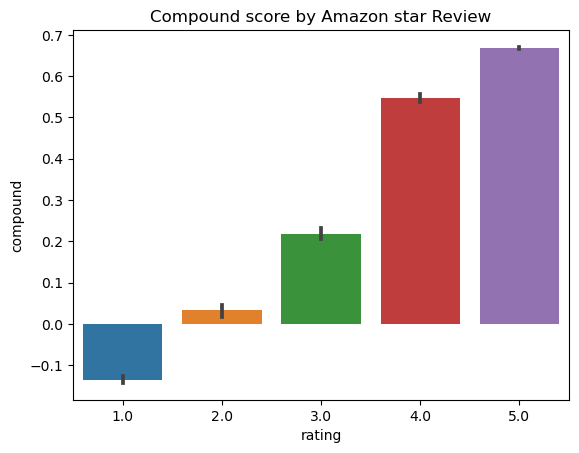

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=merged_christmas_2022, x='rating', y='compound')
ax.set_title('Compound score by Amazon star Review')
plt.show()

In [ ]:
### Step 12 Compare vader score with positive neutral or negative scores


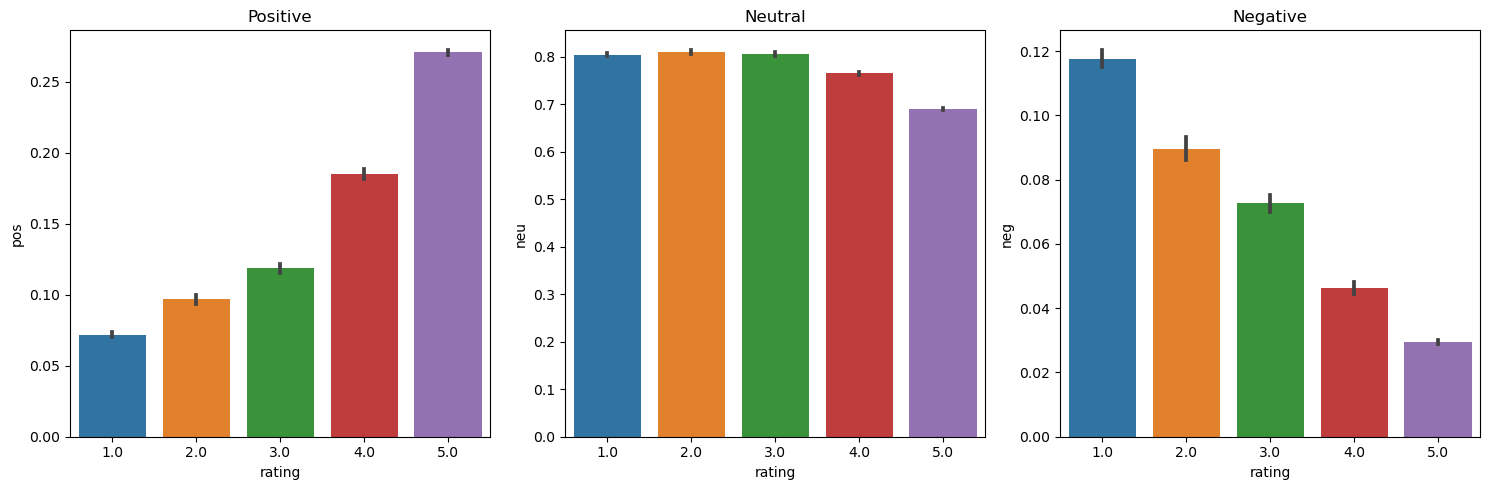

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



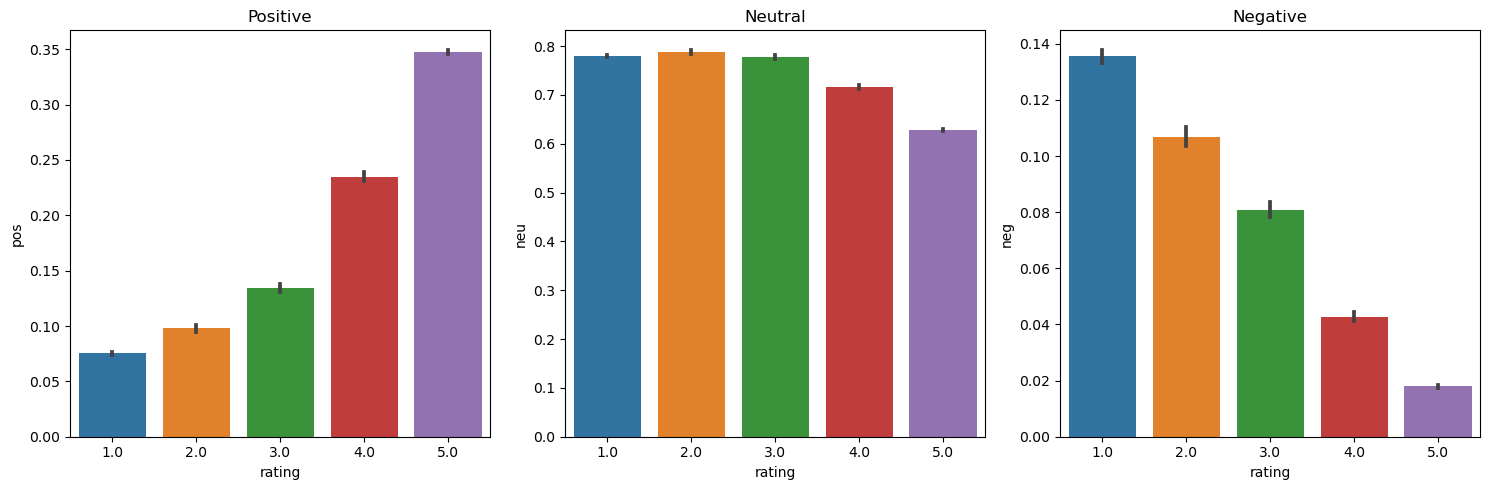

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

